<a href="https://colab.research.google.com/github/sellauno/PVCK_1/blob/main/Modul5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pylab as plt 
import numpy as np

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


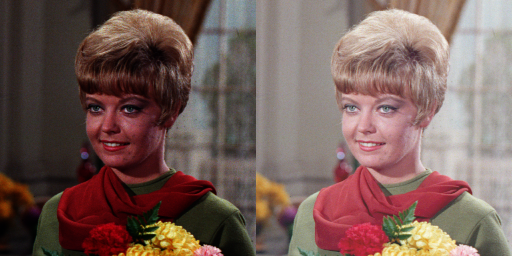

In [ ]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/female.tiff')

invGamma = 1.0 / gamma
table = np.array([((i / 255.0) ** invGamma) * 255
    for i in np.arange(0, 256)]).astype("uint8")
adjusted = cv.LUT(original, table)
final_frame = cv.hconcat((original, adjusted))
cv2_imshow(final_frame)

Simulasi Image depth 
----------------------------------
Masukkan nilai bit depth [1-7]: 2


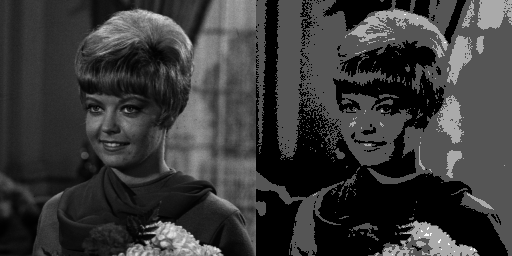

In [48]:
print('Simulasi Image depth ')
print('----------------------------------')
try:
  depth = int (input('Masukkan nilai bit depth [1-7]: '))
except ValueError:
  print('Error, not a number')
  
original = cv.imread('/content/drive/MyDrive/Images/female.tiff', cv.IMREAD_GRAYSCALE)
hasil = np.zeros(original.shape, original.dtype)
level = 255/(2** depth - 1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    hasil[y,x] = np.clip(round((original[y,x]/level))*level, 0, 255)

final_depth = cv.hconcat((original, hasil))
cv2_imshow(final_depth)


In [ ]:
import glob
from math import log10, sqrt

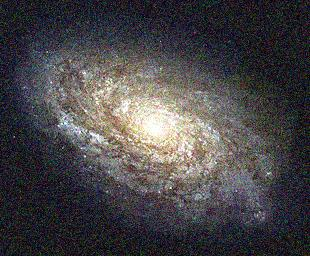

PSNR 5 value is 28.317680563538012 dB


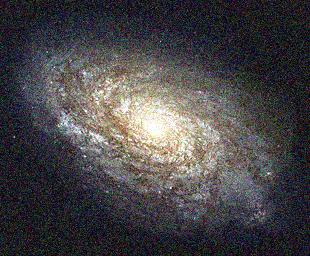

PSNR 30 value is 30.117559929283026 dB


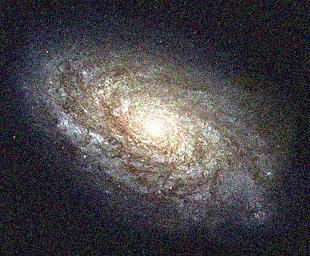

PSNR 60 value is 30.291046015165787 dB


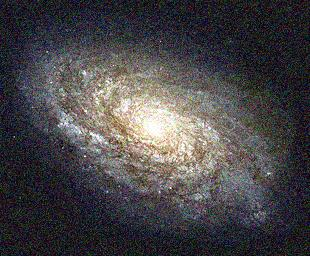

PSNR 80 value is 31.250188636857487 dB


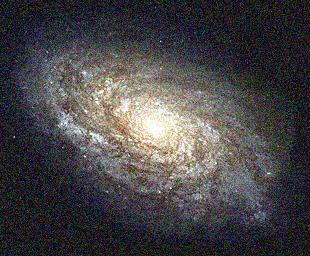

PSNR 100 value is 30.289409657711182 dB


In [ ]:
original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

def PSNR(original, compressed):
  first_image = cv_img[0]
  for x in range(1, compressed):
    if(x==0):
      continue
  first_image = first_image - cv_img[x]

  mse = np.mean((first_image) ** compressed)
  if(mse == 0): 
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr


value = PSNR(cv_img, 5)
cv2_imshow(cv_img[4])
print(f"PSNR 5 value is {value} dB")

value = PSNR(cv_img, 30)
cv2_imshow(cv_img[29])
print(f"PSNR 30 value is {value} dB")

value = PSNR(cv_img, 60)
cv2_imshow(cv_img[59])
print(f"PSNR 60 value is {value} dB")

value = PSNR(cv_img, 80)
cv2_imshow(cv_img[79])
print(f"PSNR 80 value is {value} dB")

value = PSNR(cv_img, 100)
cv2_imshow(cv_img[99])
print(f"PSNR 100 value is {value} dB")

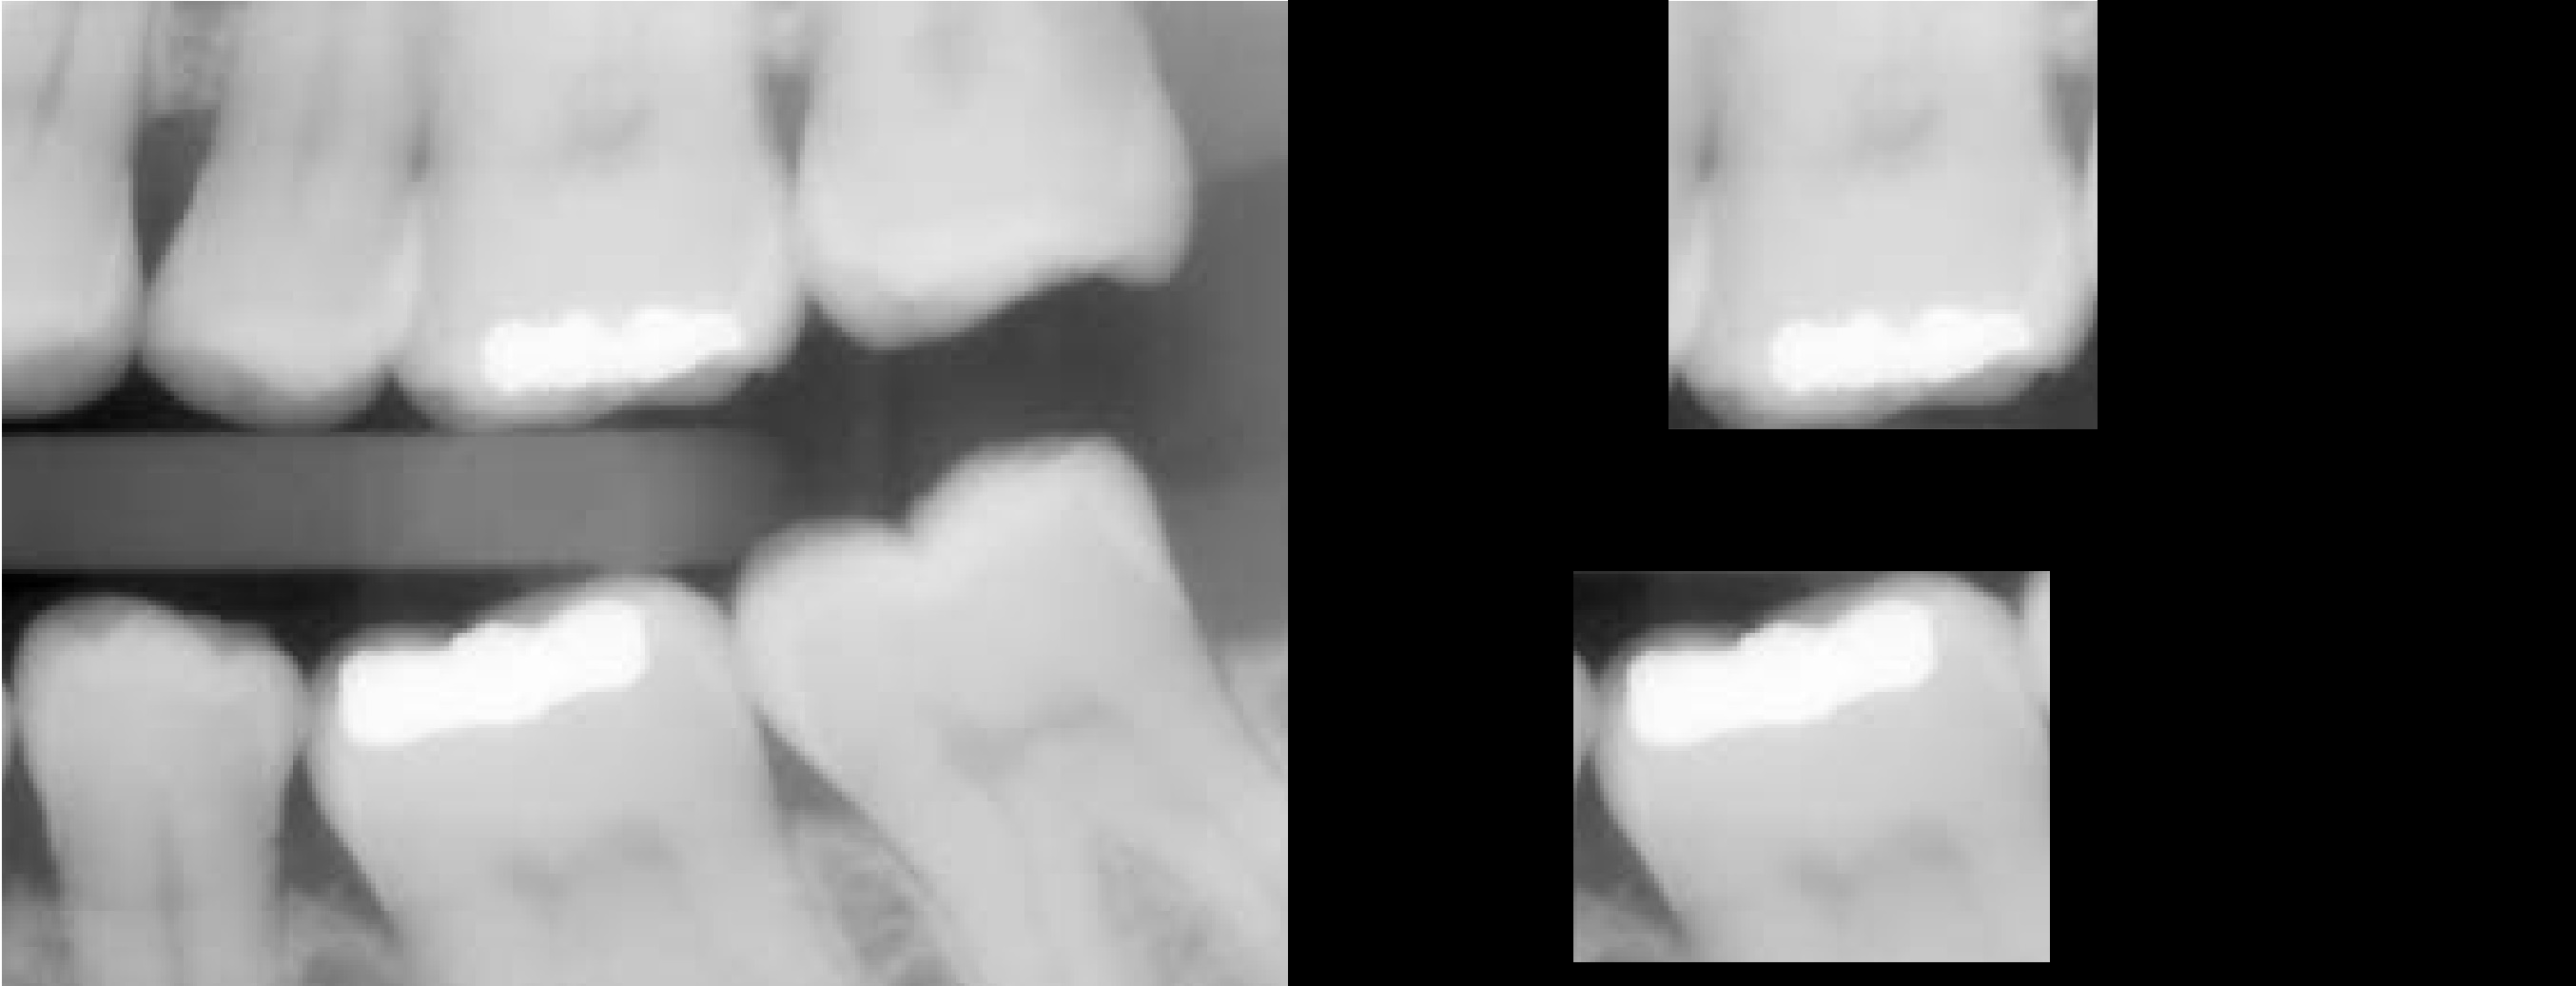

In [47]:
image = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')
mask = np.zeros(image.shape[:2], dtype="uint8")
cv.rectangle(mask, (300, 1010), (800, 600), 255, -1)
cv.rectangle(mask, (400, 450), (850, 0), 255, -1)

masked = cv.bitwise_and(image, image, mask=mask)

final_frame = cv.hconcat((image, masked))
cv2_imshow(final_frame)

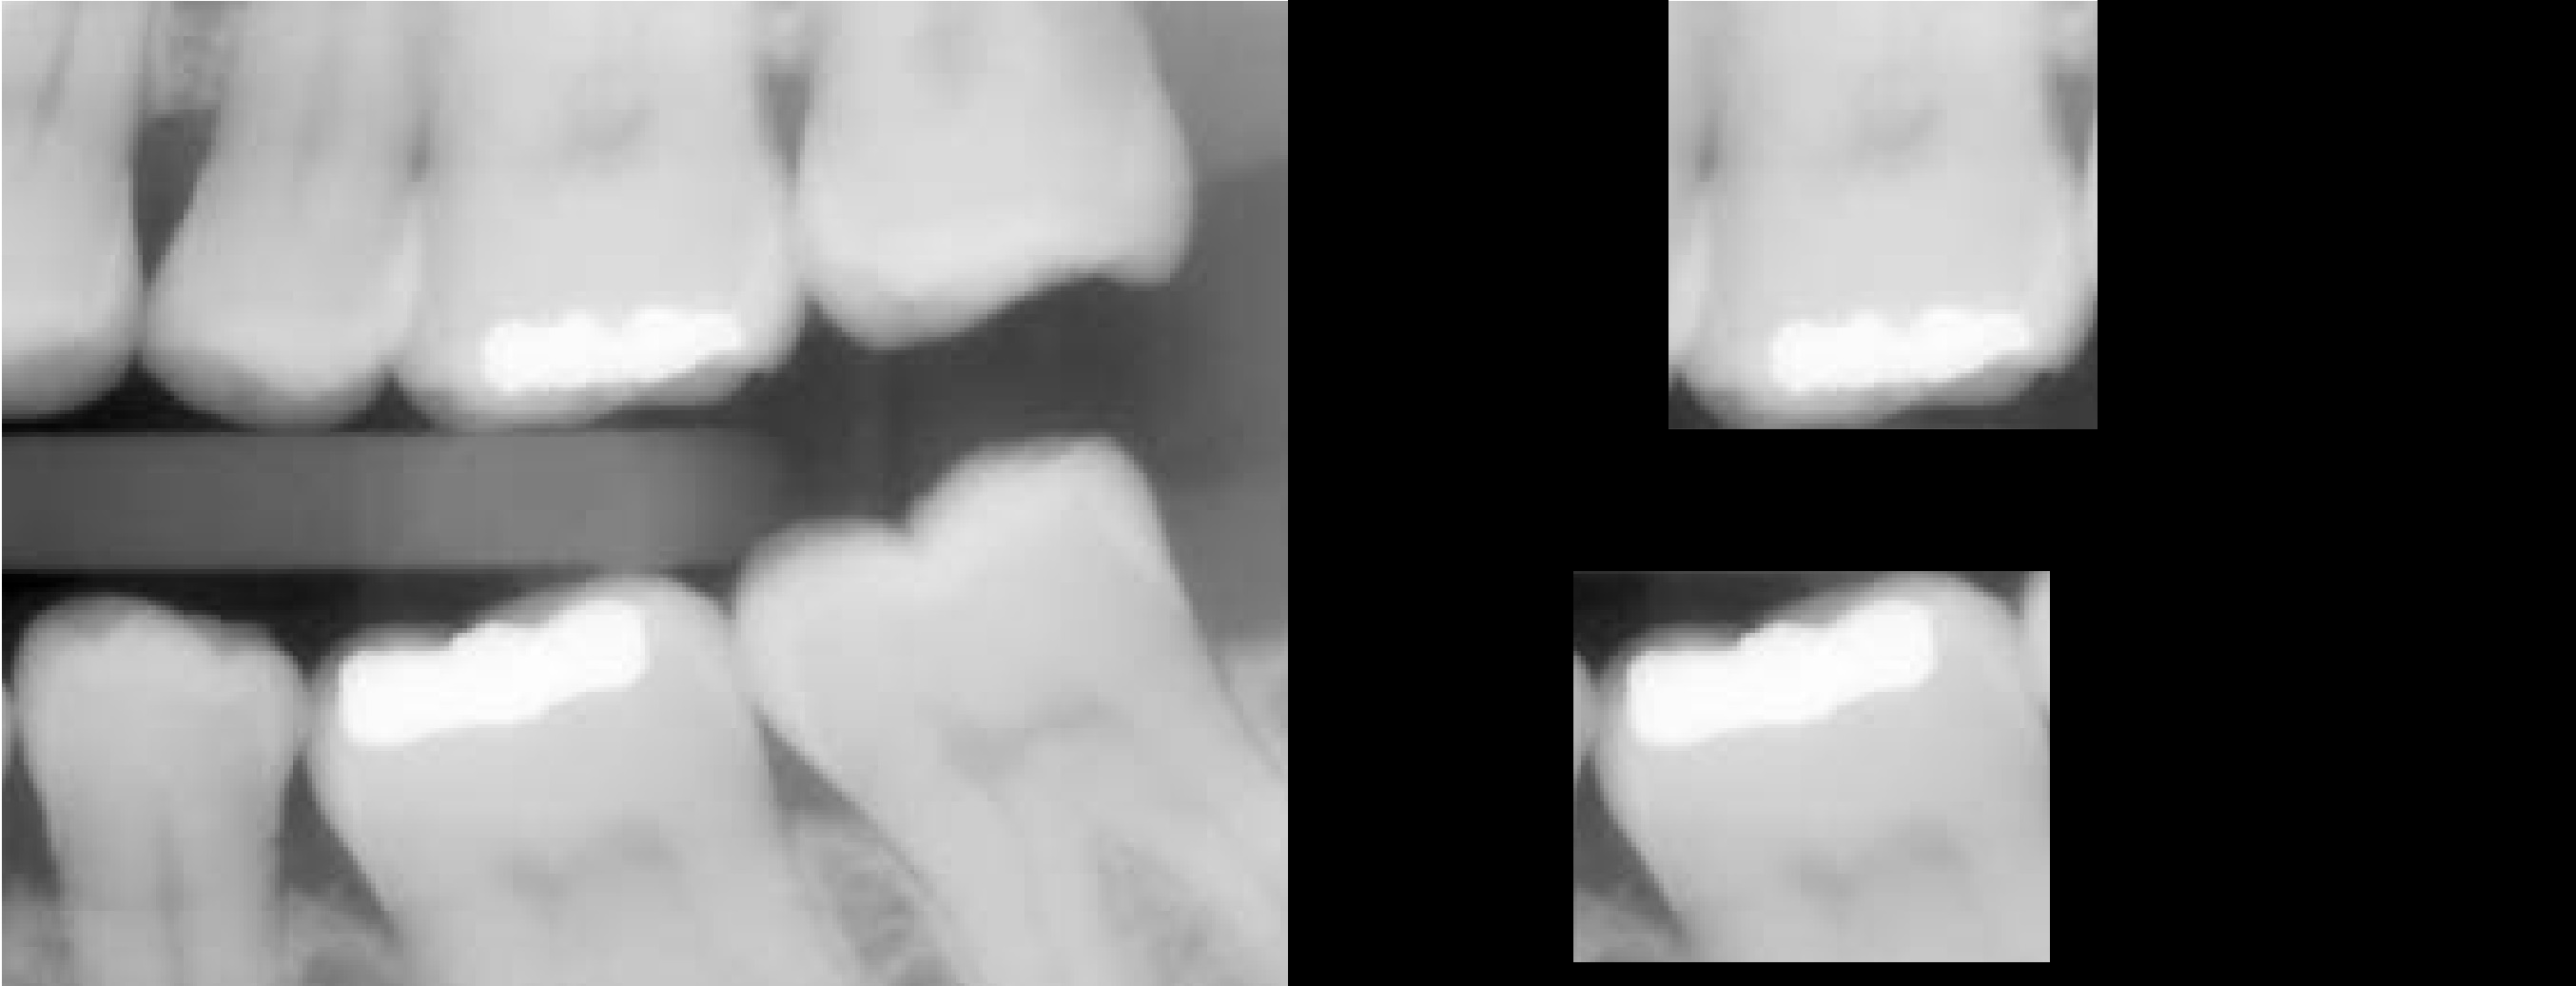

In [29]:
image = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')
mask = np.zeros(image.shape[:2], dtype="uint8")
cv.rectangle(mask, (300, 1010), (800, 600), 255, -1)
cv.rectangle(mask, (400, 450), (850, 0), 255, -1)

masked = cv.bitwise_or(image, image, mask=mask)

final_frame = cv.hconcat((image, masked))
cv2_imshow(final_frame)

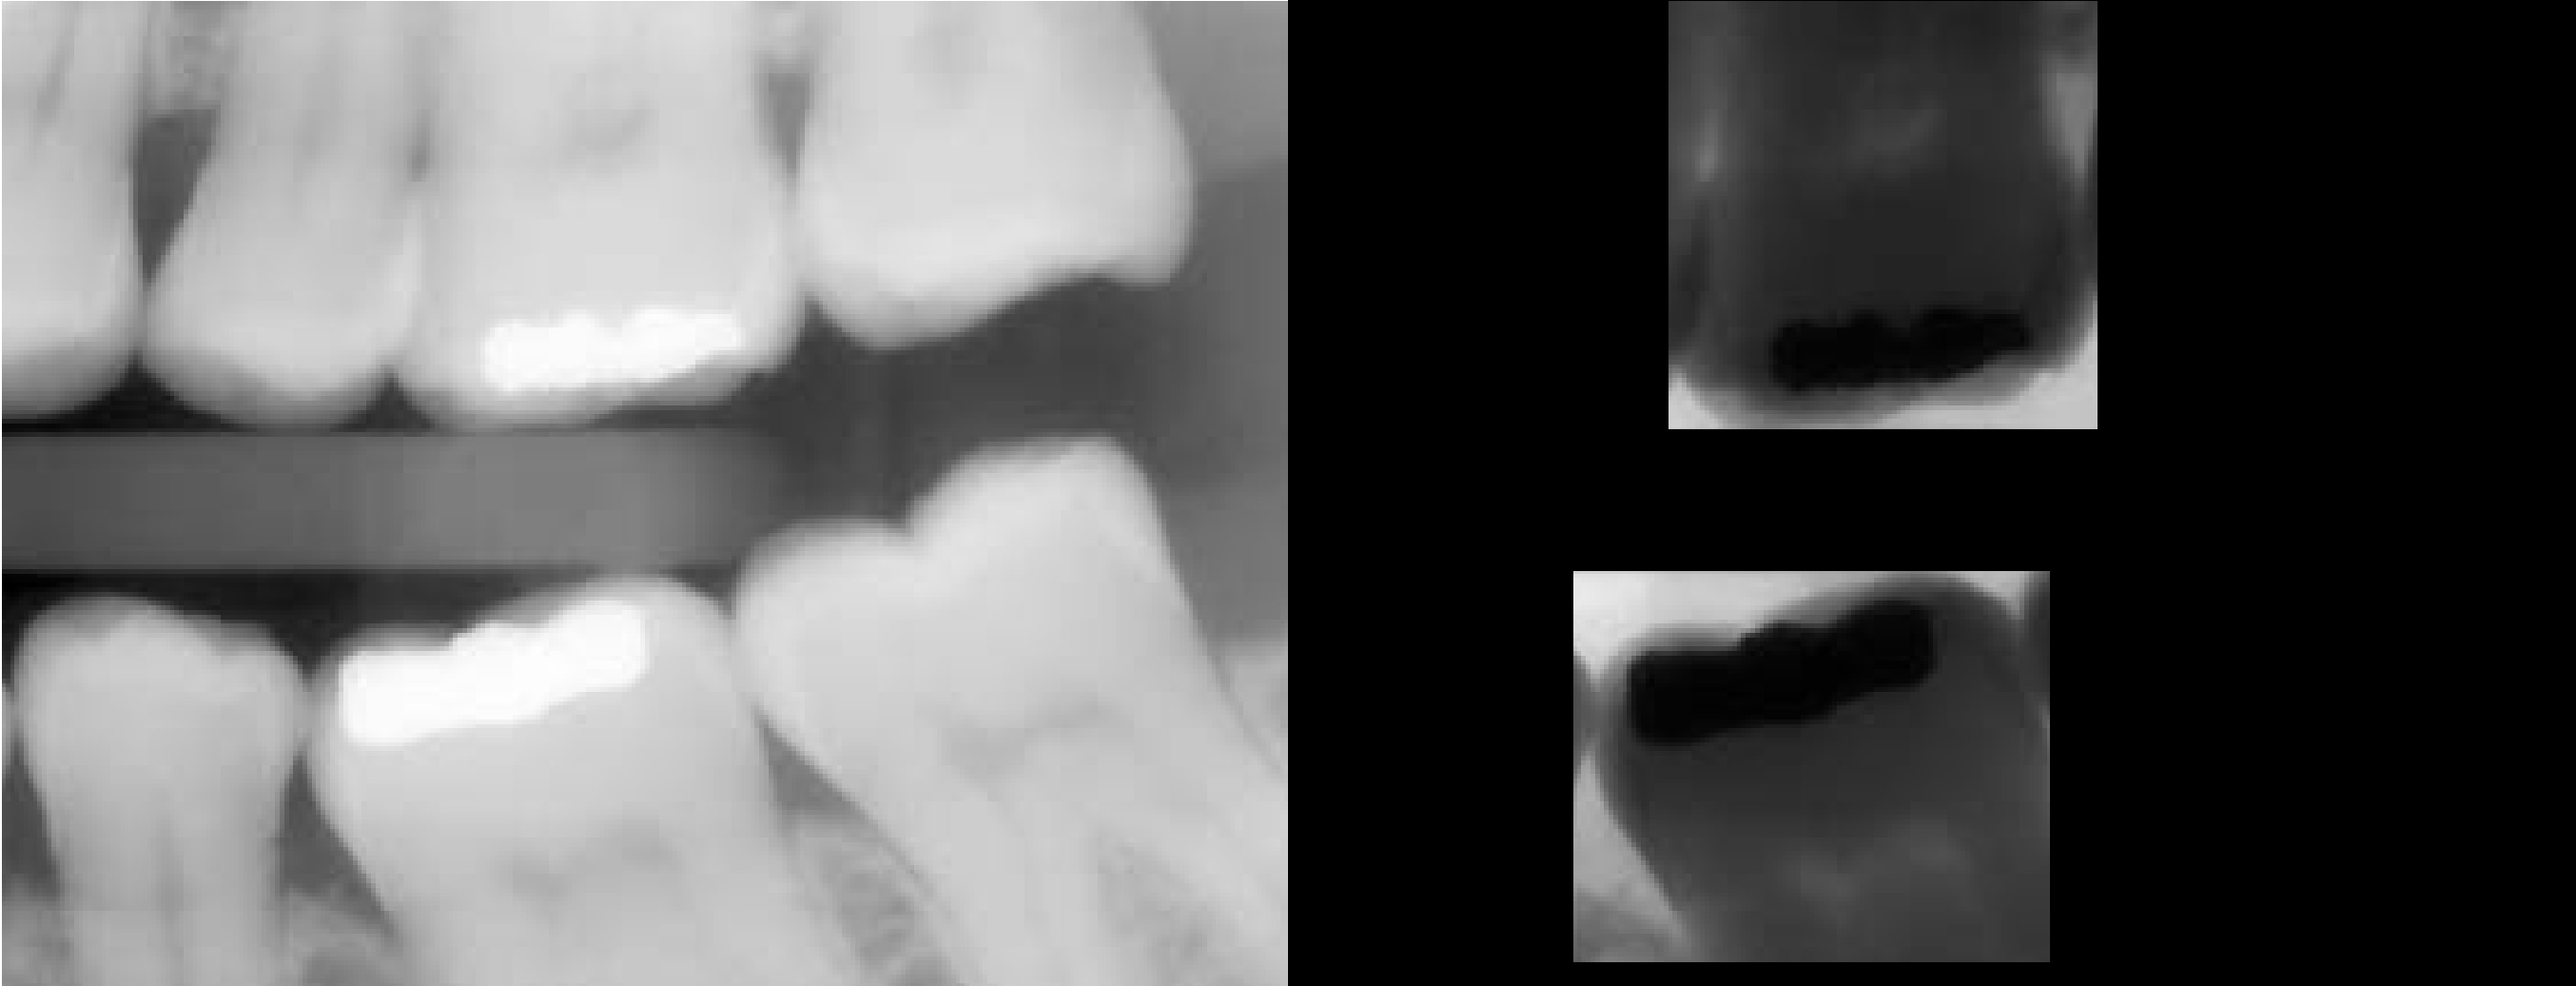

In [32]:
image = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')
mask = np.zeros(image.shape[:2], dtype="uint8")
cv.rectangle(mask, (300, 1010), (800, 600), 255, -1)
cv.rectangle(mask, (400, 450), (850, 0), 255, -1)

masked = cv.bitwise_not(image, mask=mask)

final_frame = cv.hconcat((image, masked))
cv2_imshow(final_frame)

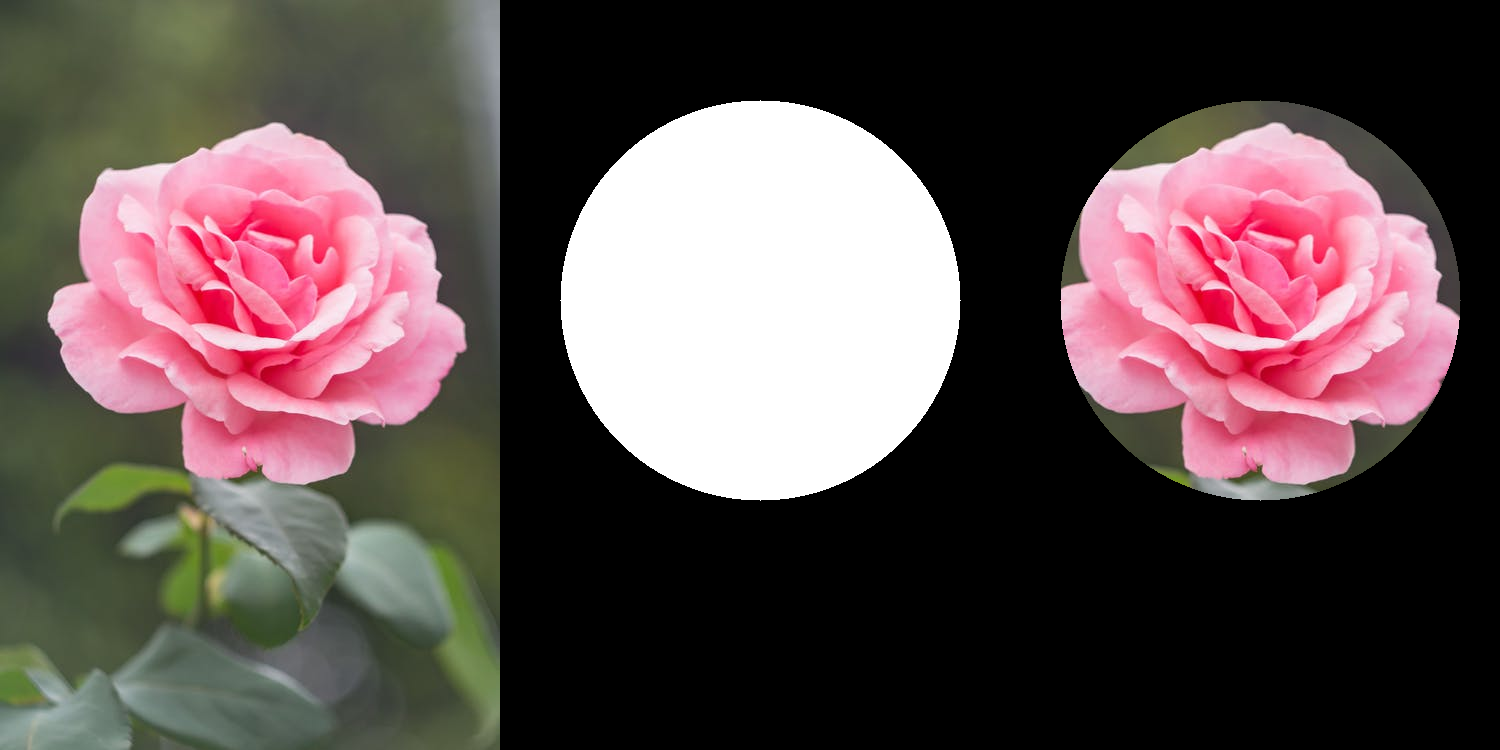

In [72]:
original = cv.imread('/content/drive/MyDrive/Images/rose_pink.png')

mask_and = np.zeros(original.shape, original.dtype)
mask_and = cv.circle(mask_and, (260,300), 200, (255,255,255), -1)

masked_output = original & mask_and

final_frame = cv.hconcat((original, mask_and, masked_output))
cv2_imshow(final_frame)

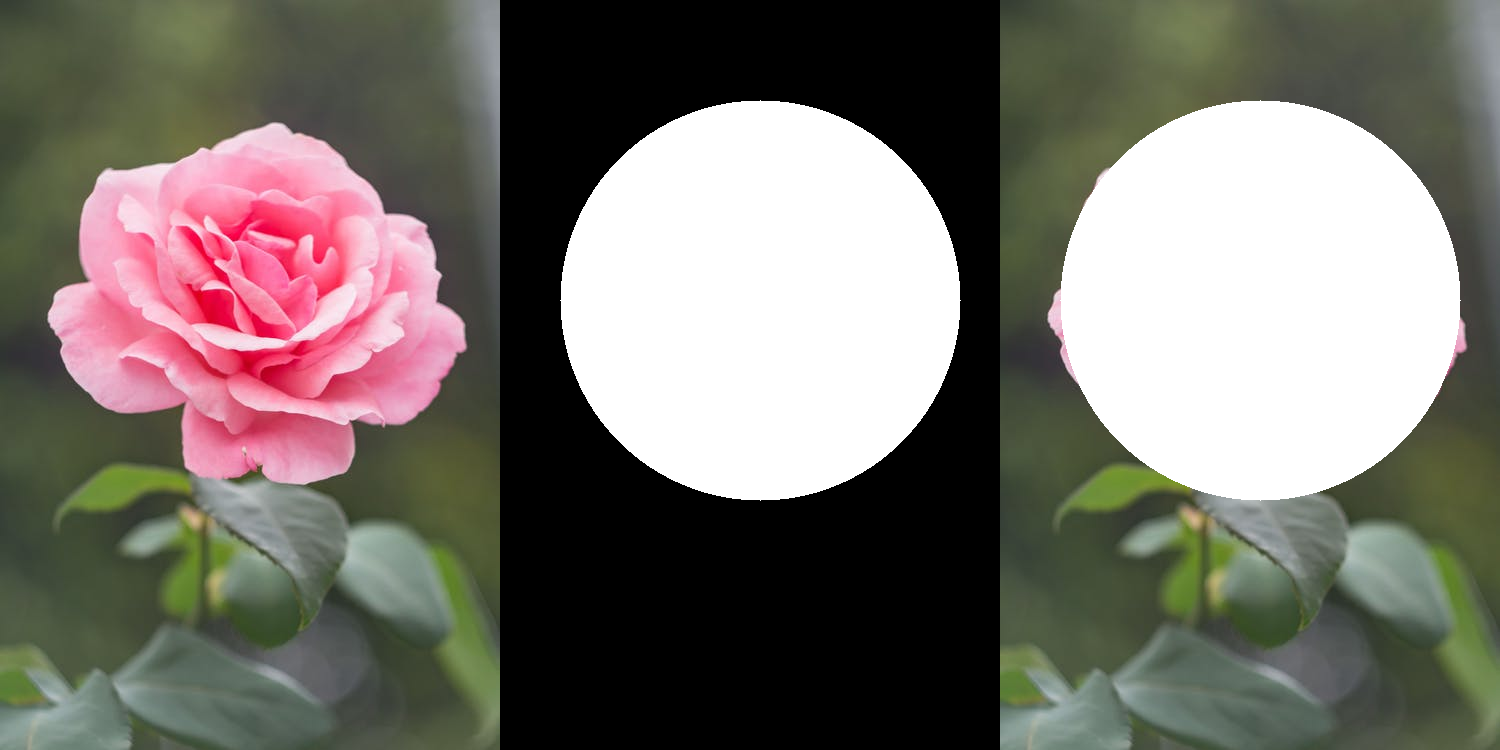

In [67]:
original = cv.imread('/content/drive/MyDrive/Images/rose_pink.png')

mask_or = np.zeros(original.shape, original.dtype)
mask_or = cv.circle(mask_or, (260,300), 200, (255,255,255), -1)

masked_output = original | mask_or

final_frame = cv.hconcat((original, mask_or, masked_output))
cv2_imshow(final_frame)

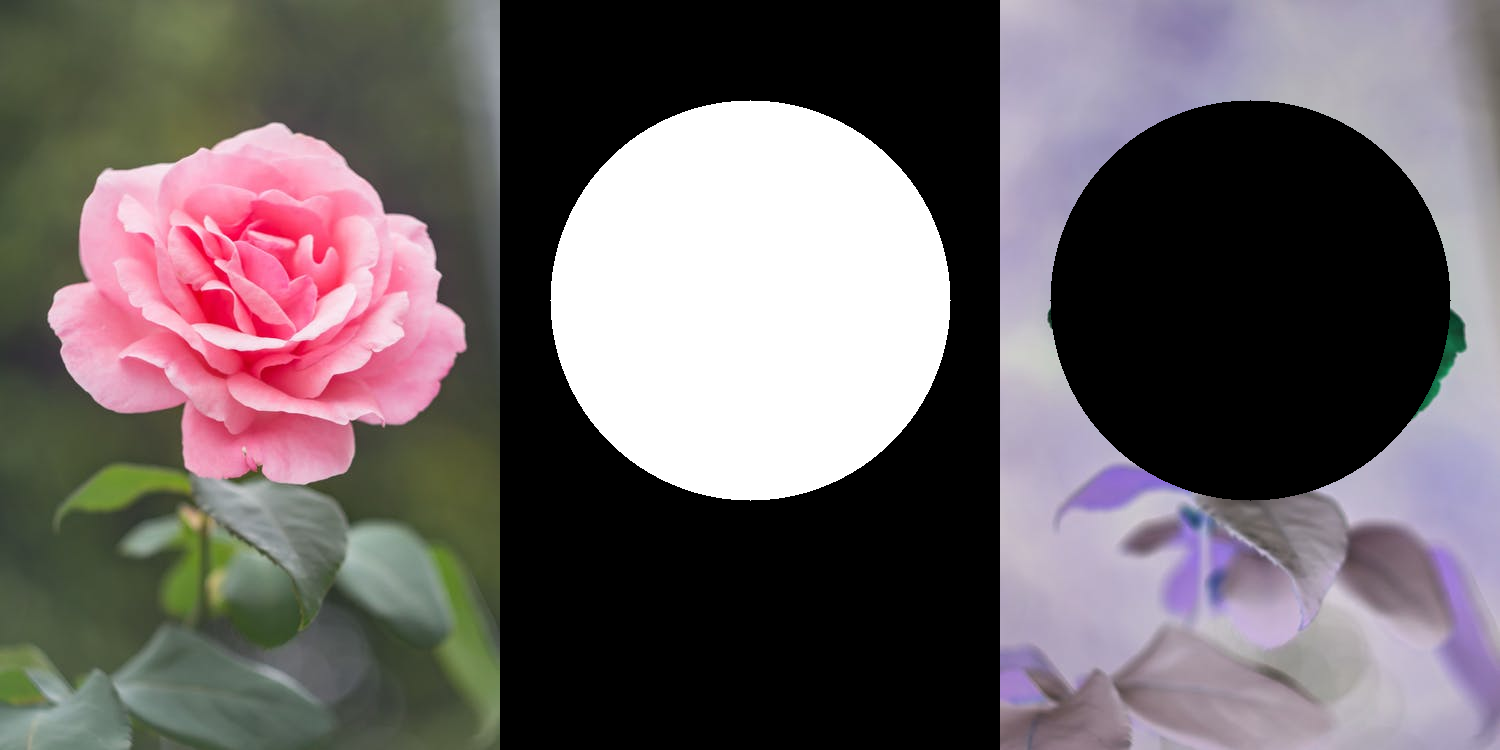

In [69]:
original = cv.imread('/content/drive/MyDrive/Images/rose_pink.png')

mask_not = np.zeros(original.shape, original.dtype)
mask_not = cv.circle(mask_not, (250,300), radius=200, color=(255,255,255), thickness=-1)

masked_output = ~original & ~mask_not

final_frame = cv.hconcat((original, mask_not, masked_output))
cv2_imshow(final_frame)

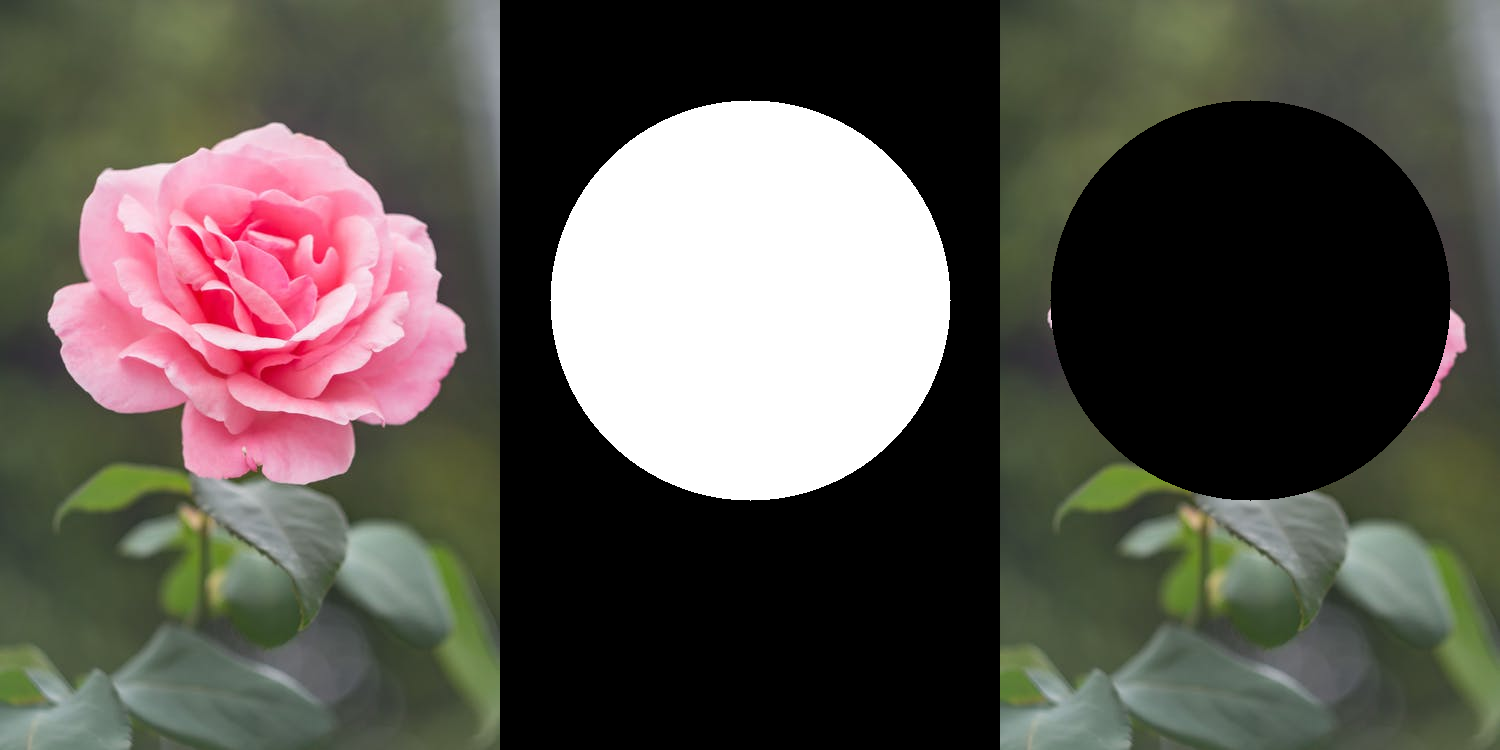

In [70]:
original = cv.imread('/content/drive/MyDrive/Images/rose_pink.png')

mask_and = np.zeros(original.shape, original.dtype)
mask_and = cv.circle(mask_not, (250,300), radius=200, color=(255,255,255), thickness=-1)

masked_output = original & ~mask_and

final_frame = cv.hconcat((original, mask_and, masked_output))
cv2_imshow(final_frame)

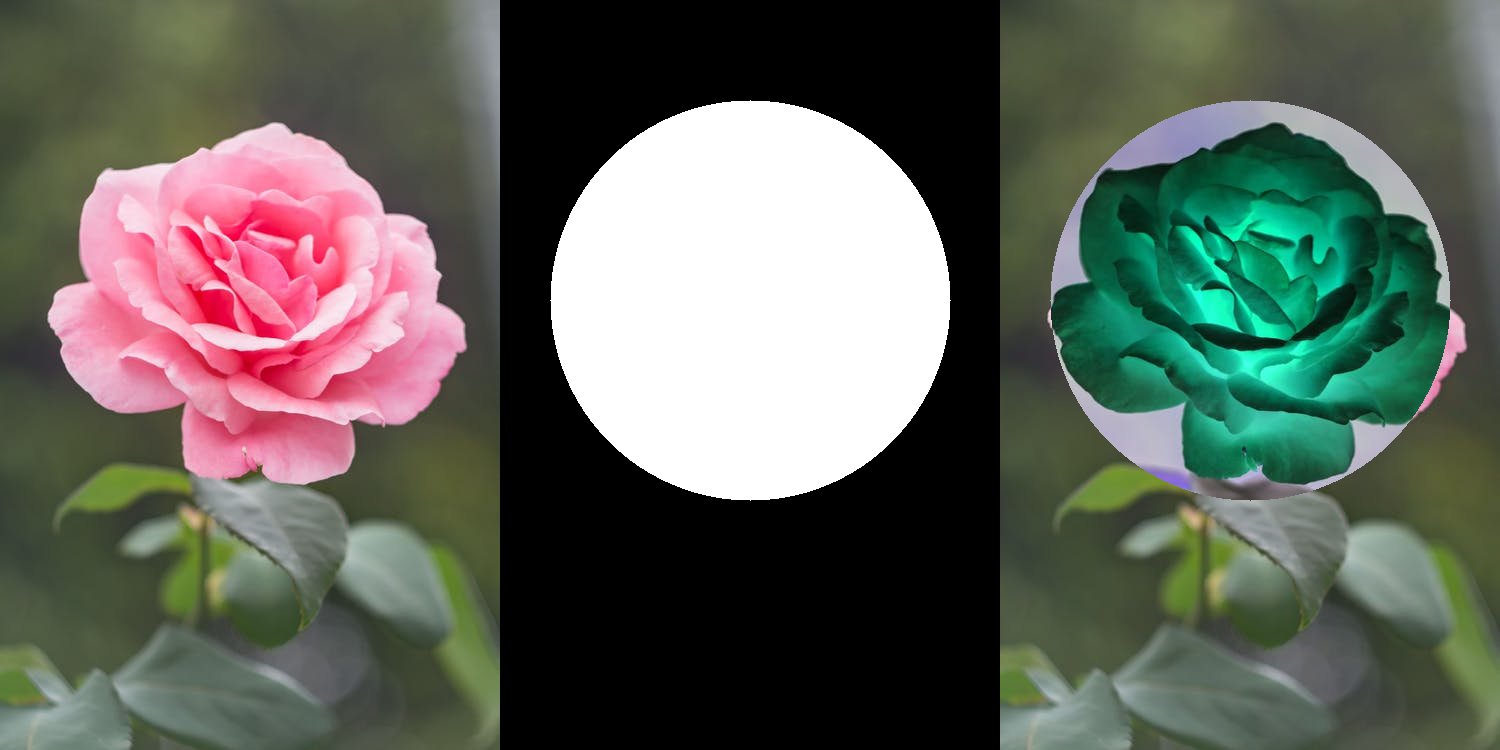

In [71]:
original = cv.imread('/content/drive/MyDrive/Images/rose_pink.png')

mask_xor = np.zeros(original.shape, original.dtype)
mask_xor = cv.circle(mask_not, (250,300), radius=200, color=(255,255,255), thickness=-1)

masked_output = original ^ mask_xor

final_frame = cv.hconcat((original, mask_xor, masked_output))
cv2_imshow(final_frame)